## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras import layers
import pandas as pd

In [2]:
from imutils import paths
from pathlib import Path

## Reading the image data

In [3]:
%cd D:\\ML DL AI DSBDA\\Pistol Detection\\PistolData_merged\\pistol_images

D:\ML DL AI DSBDA\Pistol Detection\PistolData_merged\pistol_images


In [4]:
data_path = Path("D:\ML DL AI DSBDA\Pistol Detection\PistolData_merged\pistol_images")
pistol_data = list(paths.list_images(data_path))

In [5]:
pistol_data[0:5]

['D:\\ML DL AI DSBDA\\Pistol Detection\\PistolData_merged\\pistol_images\\1.jpg',
 'D:\\ML DL AI DSBDA\\Pistol Detection\\PistolData_merged\\pistol_images\\10.jpg',
 'D:\\ML DL AI DSBDA\\Pistol Detection\\PistolData_merged\\pistol_images\\100.jpg',
 'D:\\ML DL AI DSBDA\\Pistol Detection\\PistolData_merged\\pistol_images\\1000.jpg',
 'D:\\ML DL AI DSBDA\\Pistol Detection\\PistolData_merged\\pistol_images\\1001.jpg']

In [6]:
pistols_image_data = pd.Series(pistol_data, name="JPG").astype(str)

In [7]:
pistols_image_data.head()

0    D:\ML DL AI DSBDA\Pistol Detection\PistolData_...
1    D:\ML DL AI DSBDA\Pistol Detection\PistolData_...
2    D:\ML DL AI DSBDA\Pistol Detection\PistolData_...
3    D:\ML DL AI DSBDA\Pistol Detection\PistolData_...
4    D:\ML DL AI DSBDA\Pistol Detection\PistolData_...
Name: JPG, dtype: object

In [8]:
import cv2

'''
count = 0
for image_path in pistols_image_data:
    image = cv2.imread(image_path)
    cv2.imshow("image no: {}".format(count+1), image)
    cv2.waitKey()
    count += 1
    if count == 5:
        break
cv2.destroyAllWindows()

'''

## implementing visual methods

In [9]:
from skimage.morphology import skeletonize

In [10]:
def simple_vision(img_path):
    Picking_Img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)
    return Picking_Img

def skeleton_morph_vision(img_path):
    Picking_Img = simple_vision(img_path)
    Gray_Img = cv2.cvtColor(Picking_Img,cv2.COLOR_RGB2GRAY)
    _,Threshold_Img = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)
    
    Array_Img = np.array(Gray_Img > Threshold_Img).astype(int)
    Skeleton_Img = skeletonize(Array_Img)
    
    return Skeleton_Img

def threshold_vision(img_path):
    Picking_Img = simple_vision(img_path)
    Gray_Img = cv2.cvtColor(Picking_Img,cv2.COLOR_RGB2GRAY)
    _,threshold_Img = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)
    
    return threshold_Img

def canny_vision(img_path):
    Threshold_Img = threshold_vision(img_path)
    Canny_Img = cv2.Canny(Threshold_Img,10,100)
    
    return Canny_Img

In [11]:
global pistol_label
pistol_label = 'Sample Pistol Image'

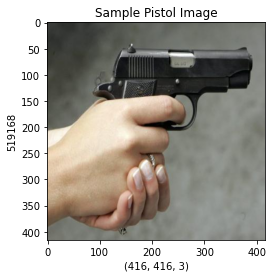

In [12]:
pistol_img = simple_vision(pistol_data[33])

plt.xlabel(pistol_img.shape)
plt.ylabel(pistol_img.size)
plt.title(pistol_label)
plt.imshow(pistol_img)

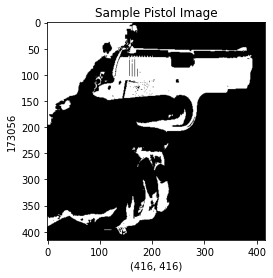

In [13]:
pistol_img = threshold_vision(pistols_image_data[33])
plt.xlabel(pistol_img.shape)
plt.ylabel(pistol_img.size)
plt.title(pistol_label)
plt.imshow(pistol_img,cmap="gray")

In [14]:
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from random import randint
number = randint(0, 2705)

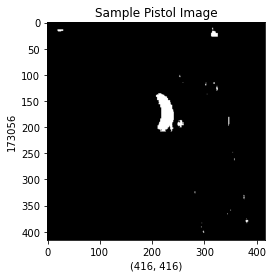

In [15]:
pistol_img = threshold_vision(pistols_image_data[number])
plt.xlabel(pistol_img.shape)
plt.ylabel(pistol_img.size)
plt.title(pistol_label)
plt.imshow(pistol_img,cmap="gray")

Text(0.5, 1.0, 'Sample Pistol Image')

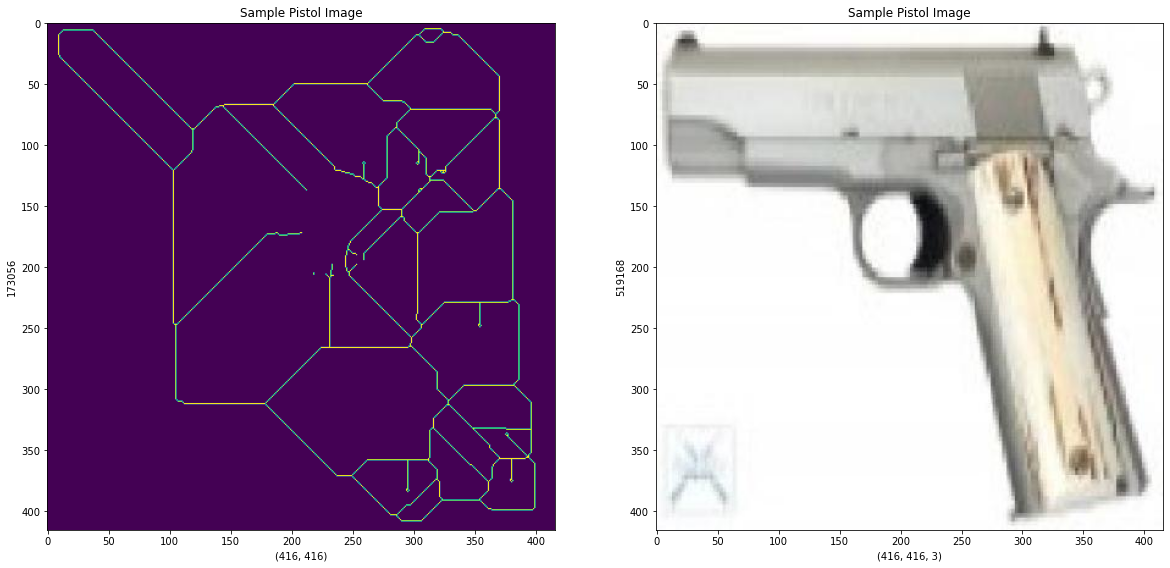

In [16]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Skel_Img = skeleton_morph_vision(pistols_image_data[number])
Simple_Img = simple_vision(pistols_image_data[number])

axis[0].imshow(Skel_Img)
axis[0].set_xlabel(Skel_Img.shape)
axis[0].set_ylabel(Skel_Img.size)
axis[0].set_title(pistol_label)
axis[1].imshow(Simple_Img)
axis[1].set_xlabel(Simple_Img.shape)
axis[1].set_ylabel(Simple_Img.size)
axis[1].set_title(pistol_label)

In [17]:
pistols_image_data[number]

'D:\\ML DL AI DSBDA\\Pistol Detection\\PistolData_merged\\pistol_images\\1187.jpg'

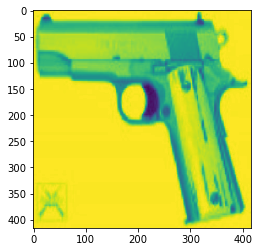

In [18]:
image = cv2.imread(str(pistols_image_data[number]), 0)
plt.imshow(image)

In [19]:
cv2.imread(pistols_image_data[number]).max(), cv2.imread(pistols_image_data[number]).min()

(255, 6)

import os
import shutil

original_folder = r'D:\ML DL AI DSBDA\Pistol Detection\PistolData_merged\pistol_images'

train = r'D:\ML DL AI DSBDA\Pistol Detection\train_data'
test = r'D:\ML DL AI DSBDA\Pistol Detection\test_data'
validation = r'D:\ML DL AI DSBDA\Pistol Detection\validation_data'

folder_list = [train, test, validation]
for i in folder_list:
    os.mkdir(i)

## Training, testing and validation set preparation

images = ['{}.jpg'.format(i) for i in range(1, 1001)]
for image_name in images:
    source_path = os.path.join(original_folder, image_name)
    dest_path = os.path.join(train, image_name)
    shutil.copy(source_path, dest_path)

images = ['{}.jpg'.format(i) for i in range(1001, 1501)]
for image_name in images:
    source_path = os.path.join(original_folder, image_name)
    dest_path = os.path.join(validation, image_name)
    shutil.copy(source_path, dest_path)

images = ['{}.jpg'.format(i) for i in range(1501, 2705)]
for image_name in images:
    source_path = os.path.join(original_folder, image_name)
    dest_path = os.path.join(test, image_name)
    shutil.copy(source_path, dest_path)

In [20]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, array_to_img

In [21]:
cv2.imread(pistols_image_data[number])

array([[[253, 255, 255],
        [253, 255, 255],
        [251, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 255, 255],
        [253, 255, 255],
        [251, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 255, 255],
        [252, 254, 254],
        [251, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[252, 250, 250],
        [252, 250, 250],
        [253, 251, 251],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[253, 251, 251],
        [253, 251, 251],
        [253, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 252, 252],
        [254, 252, 252],
        [254, 252, 252],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [22]:
sample_image = cv2.imread(pistols_image_data[number])
sample_image.shape

(416, 416, 3)

## Image dataset generation

In [23]:
trainImageData = ImageDataGenerator(rescale = 1/255)
validImageData = ImageDataGenerator(rescale = 1/255)

### Creating training, testing and validation datasets

In [24]:
train_dataset = trainImageData.flow_from_directory(
    'D:/ML DL AI DSBDA/Pistol Detection/train_data/',
    target_size = (416, 416),
    batch_size = 3,
    class_mode = 'binary'
)

Found 1000 images belonging to 1 classes.


In [25]:
validation_dataset = validImageData.flow_from_directory(
    'D:/ML DL AI DSBDA/Pistol Detection/validation_data/',
    target_size = (416, 416),
    batch_size = 3,
    class_mode = 'binary'
)

Found 500 images belonging to 1 classes.


In [26]:
testingImageData = ImageDataGenerator(rescale = 1/255)
testing_dataset = validImageData.flow_from_directory(
    'D:/ML DL AI DSBDA/Pistol Detection/test_data/',
    target_size = (416, 416),
    batch_size = 3,
    class_mode = 'binary'
)

Found 1204 images belonging to 1 classes.


In [27]:
train_dataset.class_indices

{'pistols': 0}

## Model building

### Part 1: Convolutional Neural Network

In [28]:
from keras import layers
from keras.layers import Flatten, Dense, MaxPooling2D, Conv2D
from keras.models import Sequential

In [29]:
deep_model = Sequential([
    Conv2D(16, (3, 3), activation = 'relu', input_shape = (416, 416, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(512, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),    
])

In [30]:
deep_model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']   
)

In [38]:
deep_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 414, 414, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 207, 207, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 205, 205, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 102, 102, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 64)       0

In [31]:
deep_model.fit(
    train_dataset,
    steps_per_epoch = len(train_dataset),
    epochs = 3,
    validation_data = validation_dataset
)

Epoch 1/3
334/334 [==============================] - 256s 762ms/step - loss: 0.0021 - accuracy: 0.9980 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/3
334/334 [==============================] - 250s 750ms/step - loss: 1.2679e-36 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/3
334/334 [==============================] - 254s 762ms/step - loss: 1.2679e-36 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


## CNN prediction phase

In [32]:
from keras.utils import load_img

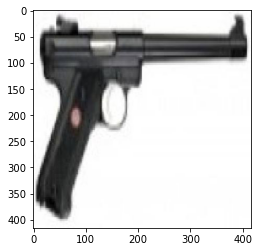

1/1 [==============================] - 0s 350ms/step
Pistol


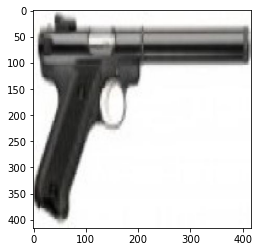

1/1 [==============================] - 0s 133ms/step
Pistol


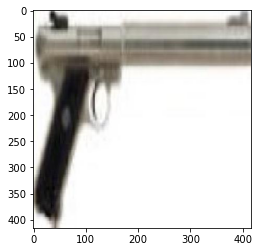

1/1 [==============================] - 0s 143ms/step
Pistol


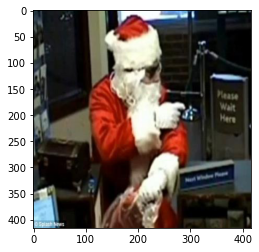

1/1 [==============================] - 0s 127ms/step
Pistol


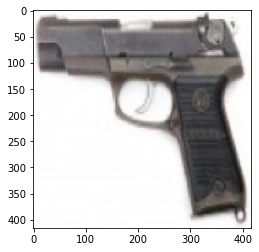

1/1 [==============================] - 0s 127ms/step
Pistol


In [33]:
import os
import numpy as np
test_path = "D:/ML DL AI DSBDA/Pistol Detection/test_data/pistol_images"
count = 0
for i in os.listdir(test_path):
    img = load_img(test_path + '/' + i)
    plt.imshow(img)
    plt.show()
    
    X = img_to_array(img)
    x_imag = np.expand_dims(X, axis = 0)
    images = np.vstack([x_imag])
    
    prediction = deep_model.predict(images)
    if prediction == 0:
        print("Pistol")
        
    else:
        print("Not a pistol")
        
    count += 1
    if count == 5:
        break   

In [34]:
# deep_model.save("D:/ML DL AI DSBDA/Pistol Detection/Models/pistol_model.h5", include_optimizer = True)

## Model Building Part 1: Artificial Neural Network

In [36]:
deep_model_2 = keras.Sequential(
    [
        keras.layers.Flatten(input_shape = (416, 416, 3)),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
    ]
)

In [37]:
deep_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 519168)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               66453632  
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 66,454,922
Trainable params: 66,454,922
Non-trainable params: 0
_________________________________________________________________


In [39]:
deep_model_2.compile(
    optimiz
    er = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [42]:
history = deep_model.fit(train_dataset, validation_data = validation_dataset, epochs = 2)

Epoch 1/2
334/334 [==============================] - 262s 783ms/step - loss: 1.2679e-36 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/2
334/334 [==============================] - 262s 784ms/step - loss: 1.2679e-36 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


## Accuracy and loss testing

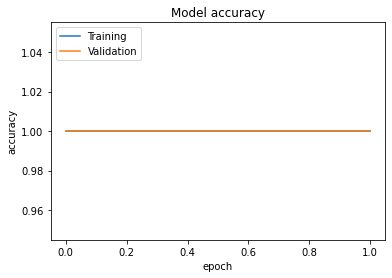

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title("Model accuracy")
plt.legend(['Training', "Validation"], loc = 'upper left')
plt.show()

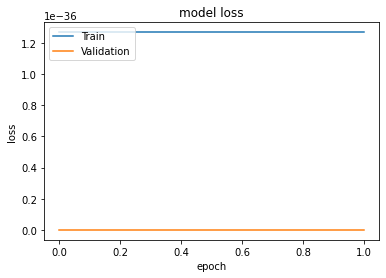

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [47]:
loss, accuracy = deep_model.evaluate(testing_dataset)

402/402 [==============================] - 52s 130ms/step - loss: 9.3533e-35 - accuracy: 1.0000
